<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сравнить временные ряды с эталонным сигналом и идентифицировать состояние (например, ЭКГ, работа двигателя автомобиля, идентификация состояния оборудования).

Взять не менее 100 значений временного ряда
- Посчитать для всех сочетаний значения коэффициентов корреляции (Пирсона, Спирмена, Кендала) и сделать соответствующие выводы.
- Посчитать значение DTW для всех сочетаний, сравнить со значениями коэффициентов корреляции, сделать выводы.
- Посчитать спектральную плотность сигнала.
- Разложить временные ряды на составляющие.

In [ ]:
pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 10.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn
from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt

In [ ]:
data1 = pd.read_csv('b30hz50.txt', sep= "\t")
data2 = pd.read_csv('h30hz50.txt', sep= "\t")
data1.head(8)

,-3.93468e+000,6.55216e+000,-1.23798e+000,2.03103e+001,Unnamed: 4
0,2.40285,9.994380,-3.242650,8.313200,NaN
1,6.24273,-3.175770,-0.686974,-4.193820,NaN
2,-3.99411,-14.144800,3.845360,-5.658600,NaN
3,1.76551,-6.464920,5.096230,-9.001360,NaN
4,8.04130,0.962914,-1.542310,2.544180,NaN
5,-4.01812,1.075990,7.167250,5.764290,NaN
6,4.91148,-4.475300,4.659730,1.985540,NaN
7,9.87637,1.056460,-6.259100,0.918555,NaN


In [ ]:
data1.rename(columns={data1.columns[0]:"s1", data1.columns[1]:"s2", data1.columns[2]:"s3", data1.columns[3]:"s4"}, inplace=True)
data1.drop(data1.columns[4], axis=1, inplace=True)
data2.rename(columns={data2.columns[0]:"s1", data2.columns[1]:"s2", data2.columns[2]:"s3", data2.columns[3]:"s4"}, inplace=True)
data2.drop(data2.columns[4], axis=1, inplace=True)
data1.head(8)

,s1,s2,s3,s4
0,2.40285,9.994380,-3.242650,8.313200
1,6.24273,-3.175770,-0.686974,-4.193820
2,-3.99411,-14.144800,3.845360,-5.658600
3,1.76551,-6.464920,5.096230,-9.001360
4,8.04130,0.962914,-1.542310,2.544180
5,-4.01812,1.075990,7.167250,5.764290
6,4.91148,-4.475300,4.659730,1.985540
7,9.87637,1.056460,-6.259100,0.918555


<Axes: >

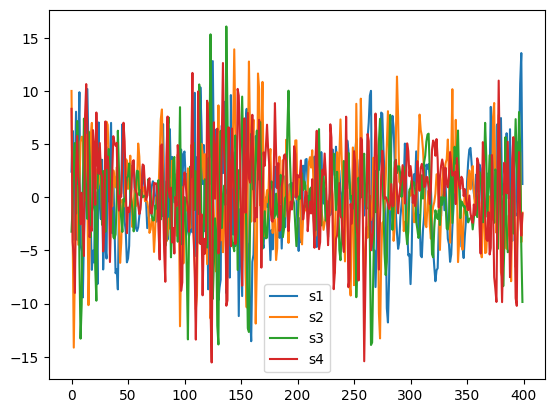

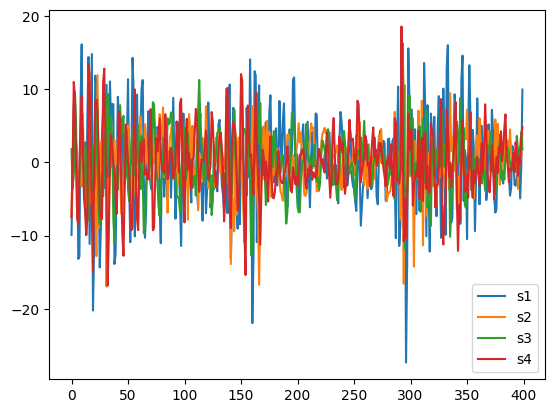

In [ ]:
start_ind = 0
end_ind = 400
data1 = data1[start_ind:end_ind]
data2 = data2[start_ind:end_ind]
data1.plot()
data2.plot()

**Корреляция**



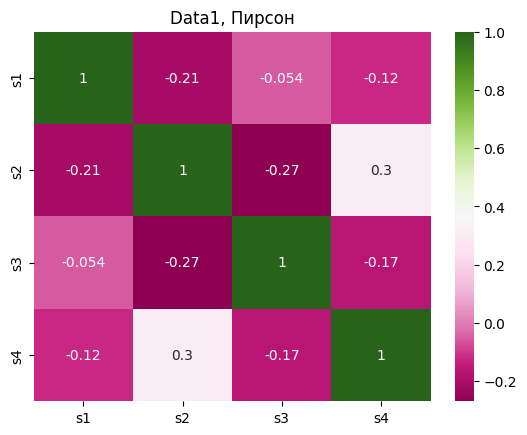

In [ ]:
#Пирсон
#позволяет определить наличие или отсутствие линейной связи между двумя количественными показателями, а также оценить ее тесноту и статистическую значимость
c = data1.corr(method="pearson")
seaborn.heatmap(c, annot=True, cmap='PiYG')
plt.title('Data1, Пирсон')
plt.show()
#обратно пропорциональноя зависимость, кроме s2 - s4

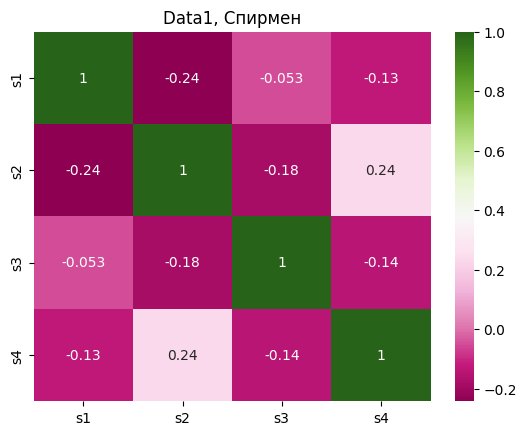

In [ ]:
#Спирмен
#позволяет определить тесноту (силу) и направление корреляционной связи между двумя признаками
c = data1.corr(method="spearman")
seaborn.heatmap(c, annot=True, cmap='PiYG')
plt.title('Data1, Спирмен')
plt.show()
#Если два признака связаны положительно, то испытуемые, имеющие низкие ранги по одному из них, будут иметь низкие ранги и по другому, а испытуемые, имеющие высокие ранги по одному из признаков, будут иметь по другому признаку также высокие ранги

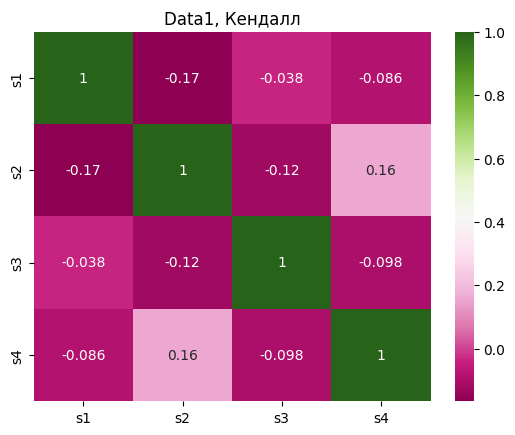

In [ ]:
#Кендалл
#мера линейной связи между случайными величинами. Корреляция Кенделла является ранговой, то есть для оценки силы связи используются не численные значения, а соответствующие им ранги.
c = data1.corr(method="kendall")
seaborn.heatmap(c, annot=True, cmap='PiYG')
plt.title('Data1, Кендалл')
plt.show()
#отрицательная корреляция

**Корреляция между сигналами двух наборов**

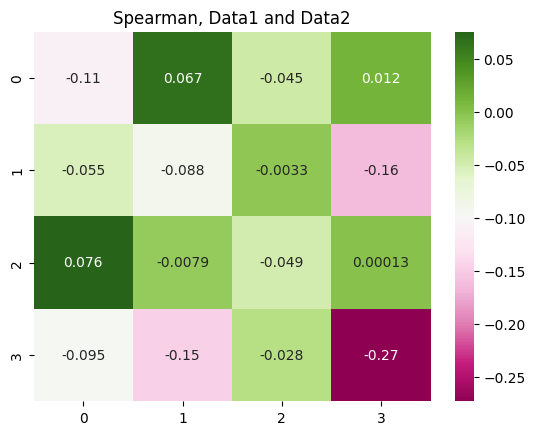

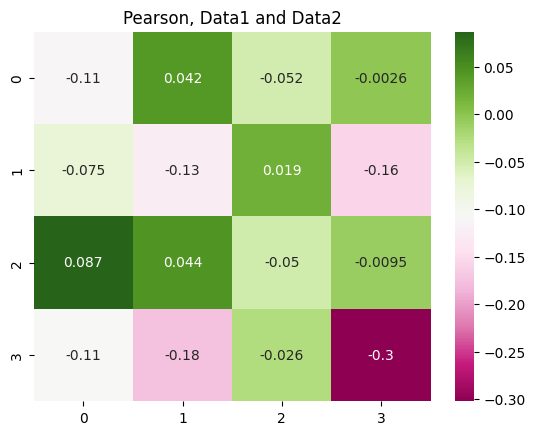

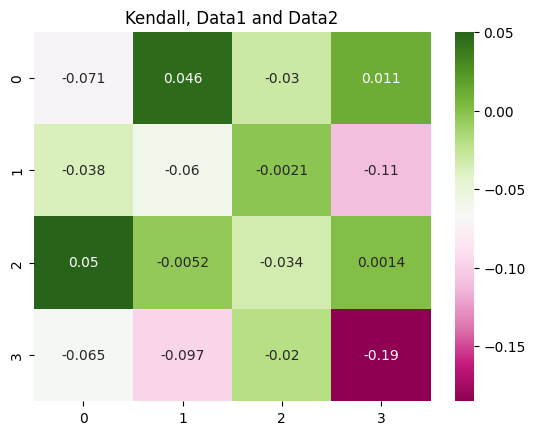

In [ ]:
from scipy import stats
corr_res = np.zeros([4,4])
#spearman
for i in range(4):
  for j in range(4):
    query = data2.iloc[:, [i]].to_numpy()[:,0]
    template = data1.iloc[:, [j]].to_numpy()[:,0]
    corr_res[i,j] = stats.spearmanr(query, template).statistic
seaborn.heatmap(corr_res, annot=True, cmap='PiYG')
plt.title('Spearman, Data1 and Data2')
plt.show()

corr_res = np.zeros([4,4])
#pearson
for i in range(4):
  for j in range(4):
    query = data2.iloc[:, [i]].to_numpy()[:,0]
    template = data1.iloc[:, [j]].to_numpy()[:,0]
    corr_res[i,j] = stats.pearsonr(query, template).statistic
seaborn.heatmap(corr_res, annot=True, cmap='PiYG')
plt.title('Pearson, Data1 and Data2')
plt.show()

corr_res = np.zeros([4,4])
#kendall
for i in range(4):
  for j in range(4):
    query = data2.iloc[:, [i]].to_numpy()[:,0]
    template = data1.iloc[:, [j]].to_numpy()[:,0]
    corr_res[i,j] = stats.kendalltau(query, template).statistic
seaborn.heatmap(corr_res, annot=True, cmap='PiYG')
plt.title('Kendall, Data1 and Data2')
plt.show()

**DTW**

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

230.59324633269804 0.11529662316634902


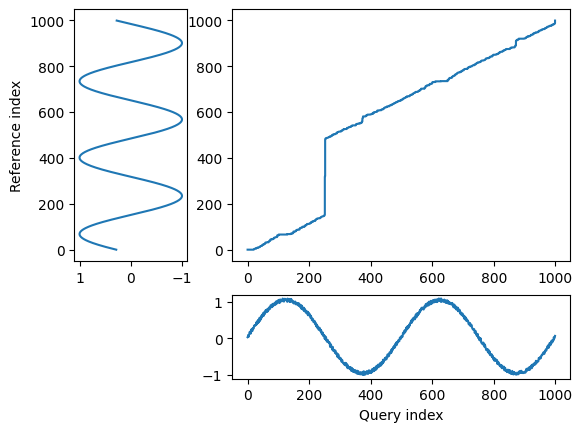

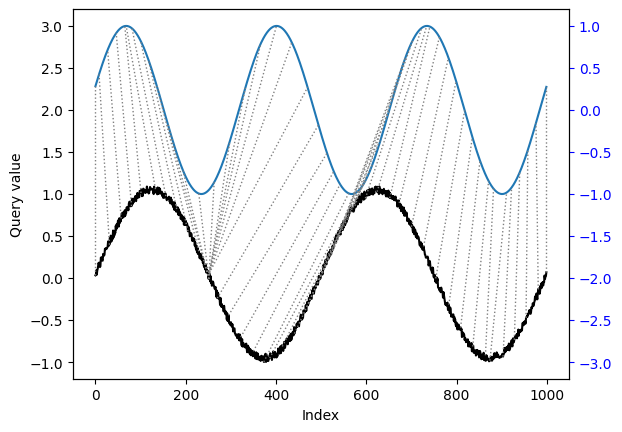

In [ ]:
idx = np.linspace(0,6.28,num=1000)
query= np.sin(idx*2) + np.random.uniform(size=1000)/10.0
template = np.cos(idx*3+5)
from dtw import *
alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")
alignment.plot(type="twoway", offset=2)

dtw_dist_norm= alignment.normalizedDistance
dtw_dist = alignment.distance
print(dtw_dist, dtw_dist_norm)

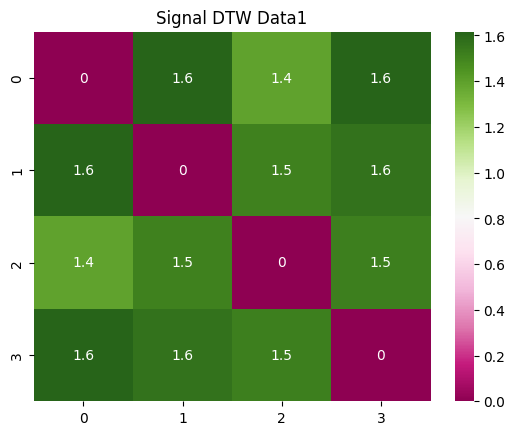

In [ ]:
dtw_res = np.zeros([4,4])
for i in range(4):
  for j in range(4):
    query = data1.iloc[:, [i]].to_numpy()
    template = data1.iloc[:, [j]].to_numpy()
    alignment = dtw(query, template, keep_internals=True)
    dtw_res[i,j] = alignment.normalizedDistance
seaborn.heatmap(dtw_res, annot=True, cmap='PiYG')
plt.title('Signal DTW Data1')
plt.show()

**DTW between Data1 Data2**

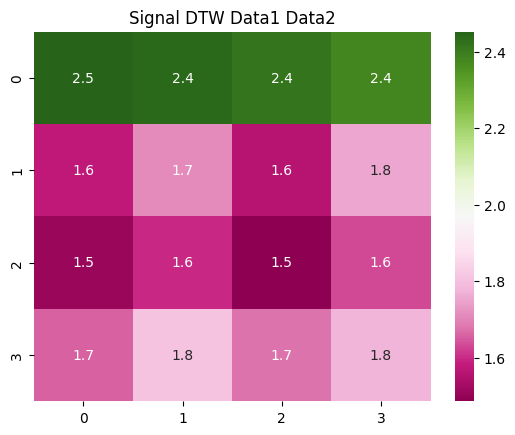

In [ ]:
dtw_res = np.zeros([4,4])
for i in range(4):
  for j in range(4):
    query = data2.iloc[:, [i]].to_numpy()
    template = data1.iloc[:, [j]].to_numpy()
    alignment = dtw(query, template, keep_internals=True)
    dtw_res[i,j] = alignment.normalizedDistance
seaborn.heatmap(dtw_res, annot=True, cmap='PiYG')
plt.title('Signal DTW Data1 Data2')
plt.show()

**Спектральная плотность мощности сигнала**

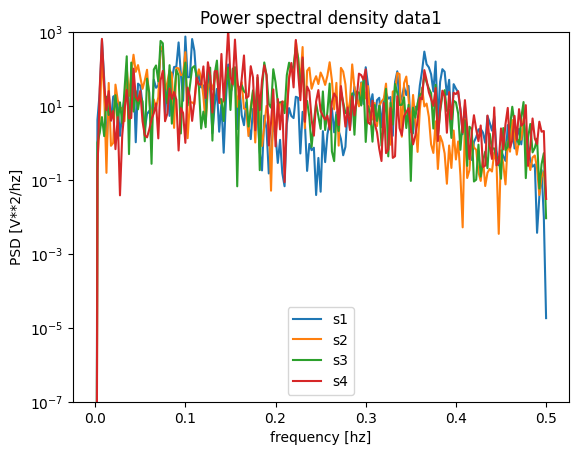

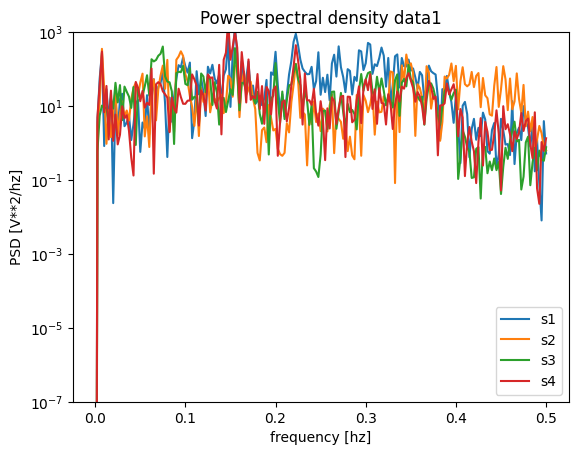

In [ ]:
from scipy import signal
for i in range(4):
  data =data1.iloc[:,[i]].to_numpy().reshape(400)
  f, Pxx_den = signal.periodogram(data,1)
  plt.semilogy(f, Pxx_den)
  plt.ylim(1e-7, 1e3)
  plt.xlabel('frequency [hz]')
  plt.ylabel('PSD [V**2/hz]')
  plt.legend(['s1', 's2', 's3', 's4'])
  plt.title('Power spectral density data1')
plt.show()


for i in range(4):
  data =data2.iloc[:,[i]].to_numpy().reshape(400)
  f, Pxx_den = signal.periodogram(data,1)
  plt.semilogy(f, Pxx_den)
  plt.ylim(1e-7, 1e3)
  plt.xlabel('frequency [hz]')
  plt.ylabel('PSD [V**2/hz]')
  plt.legend(['s1', 's2', 's3', 's4'])
  plt.title('Power spectral density data1')
plt.show()

**Декомпозиция сигнала**

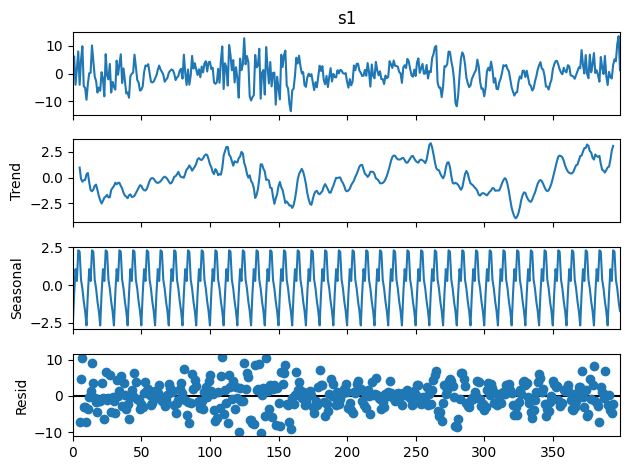

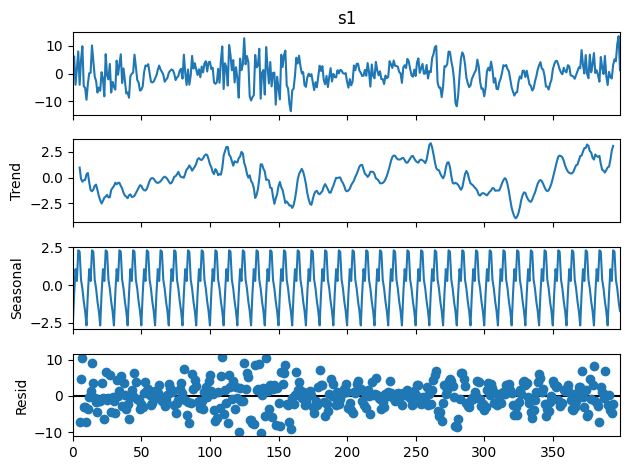

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data1.s1, model='additive', period=10).plot()